# P3: OpenStreetMap Data Case Study. Dubai and Abu-Dhabi.

### 0. Code Resources

##### 0.1. Code Library

In [18]:
library(devtools)

In [19]:
library(markdown)

In [20]:
library(ggplot2)

In [21]:
library(ggthemes)

In [22]:
library(RColorBrewer)

In [46]:
library(dplyr)

In [92]:
IRkernel::installspec()

In [91]:
# install.packages("shiny") 

In [49]:
library(plotly)

In [50]:
library(plotrix)

In [51]:
library(dygraphs)

In [52]:
library(leaflet)

In [53]:
library(highcharter)

In [54]:
library(magrittr)

In [55]:
library(RJSONIO)

In [56]:
library(rbokeh)

In [57]:
library(maps)

In [58]:
# news(package="maps")

In [59]:
library(rworldmap)

In [60]:
library(rworldxtra)

In [61]:
library(GEOmap)

In [62]:
library(maptools)

In [63]:
library(ggmap)

In [64]:
library(R2HTML)

In [65]:
library(osmar)

In [66]:
library(rjson)

In [67]:
library(purrr)

In [68]:
library(DT)

In [88]:
library(zoom)

##### 0.2. Useful links

https://wiki.openstreetmap.org/wiki/OSM_XML

https://www.datacamp.com/community/tutorials/r-data-import-tutorial#gs.jUE2UHw

http://www2.uaem.mx/r-mirror/web/packages/osmar/osmar.pdf

https://www.researchgate.net/publication/274740645_Harnessing_open_street_map_data_with_R_and_QGIS

## 1. Map Area

#### 1.1.  The map
I have chosed the map sector of the dynamically developing area in the UAE.

For displaying the area I have used the  package "ggmap" and the coordinates of this area in dubai_abu-dhabi.osm.

In [69]:
options(repr.plot.width = 9, repr.plot.height = 9)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=dubai&zoom=8&size=640x640&scale=2&maptype=terrain&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=dubai&sensor=false


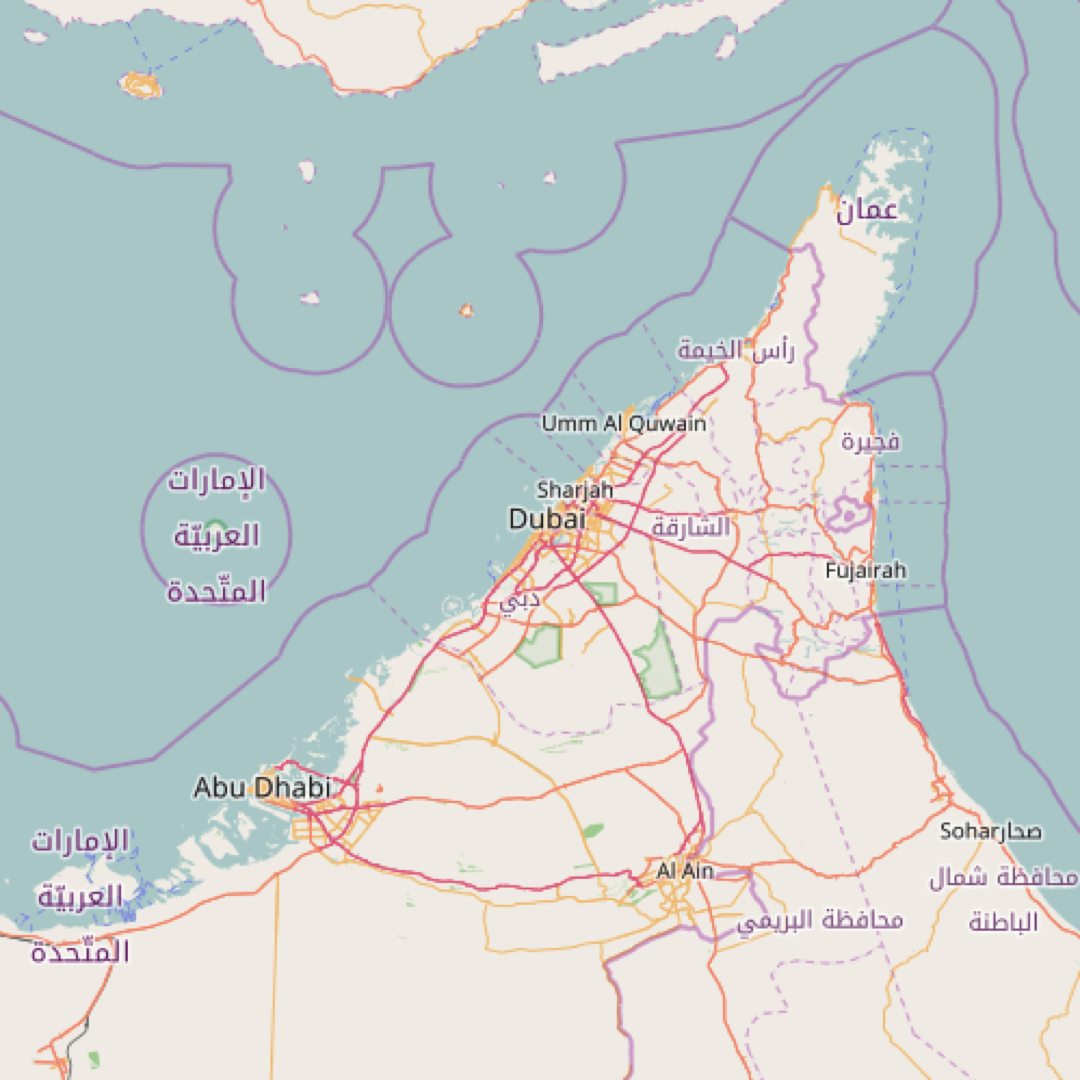

In [70]:
qmap(location = "dubai", zoom = 8, source = "osm")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=25.2048,55.2708&zoom=8&size=640x640&scale=2&maptype=hybrid&language=en-EN&sensor=false


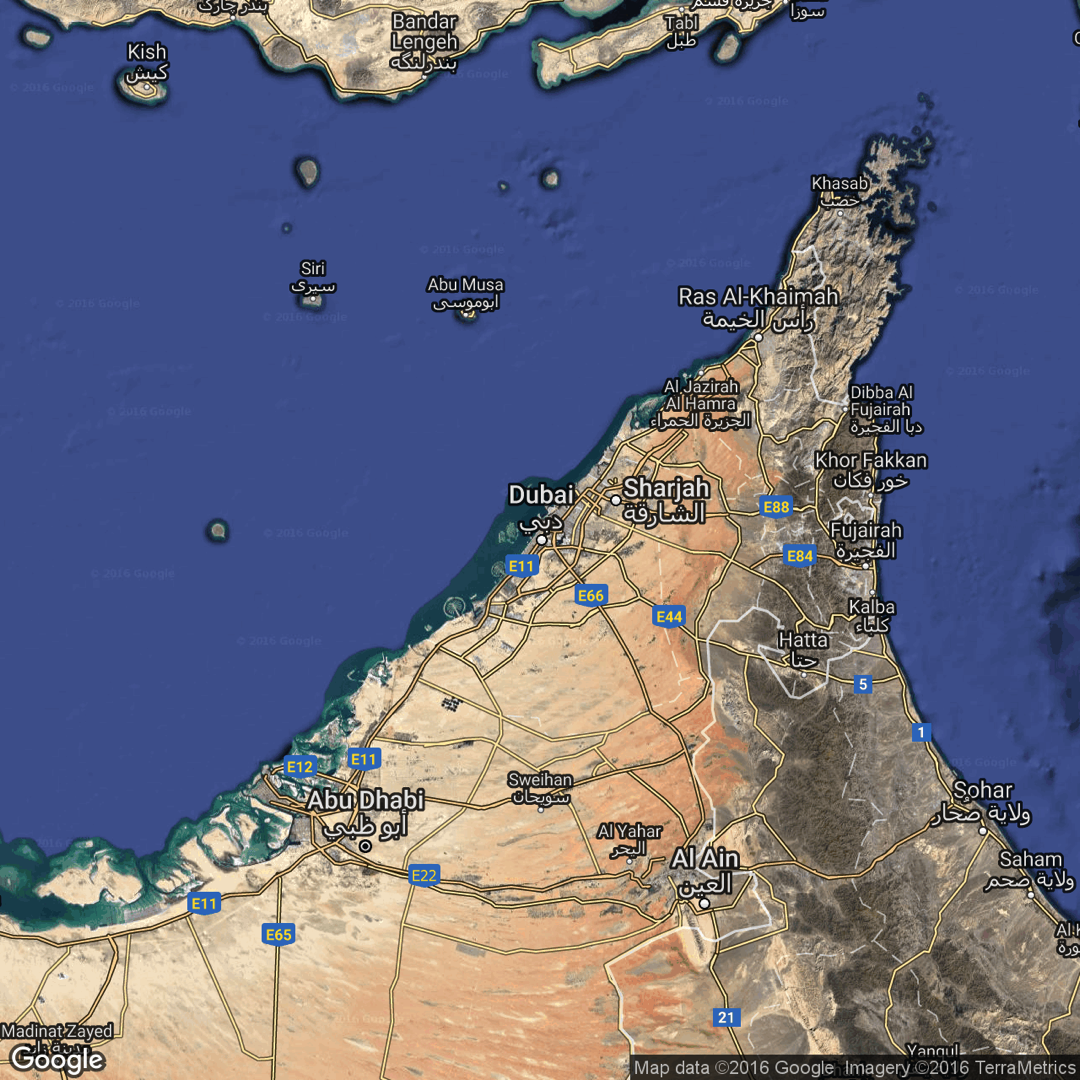

In [71]:
dubai_map <- get_map(location = c(lon = 55.2708, lat = 25.2048),
    color = "color", source = "google", maptype = "hybrid", zoom = 8)
 
ggmap(dubai_map, extent = "device", ylab = "Latitude", xlab = "Longitude")

##### bounds: minlat="23.7350" minlon="53.5800" maxlat="26.5390" maxlon="56.8870"

##### 1.2 Extract with osmar R
There are several ways to extract geodata. One of them is to do this with this R code cell.

This set of commands allows us to upload the data using the coordinates.

In [72]:
src <- osmsource_api()

In [73]:
smallbox <- center_bbox(55.2708, 25.2048, 1000, 1000)
sdubai <- get_osm(smallbox, source = src)

In [74]:
str(sdubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	1486 obs. of  9 variables:
  .. ..$ id       : num [1:1486] 9.40e+07 1.12e+09 1.12e+09 1.12e+09 1.12e+09 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:1486], format: "2010-12-02 13:32:04" "2012-08-14 22:09:32" ...
  .. ..$ version  : num [1:1486] 5 2 1 2 2 2 2 2 2 3 ...
  .. ..$ changeset: num [1:1486] 6514690 12732672 7103923 12732672 12732672 ...
  .. ..$ user     : Factor w/ 49 levels "Alex111X","andi9876",..: 40 43 43 43 43 43 43 43 43 43 ...
  .. ..$ uid      : Factor w/ 49 levels "10927","114220",..: 1 15 15 15 15 15 15 15 15 15 ...
  .. ..$ lat      : num [1:1486] 25.2 25.2 25.2 25.2 25.2 ...
  .. ..$ lon      : num [1:1486] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	218 obs. of  3 variables:
  .. ..$ id: num [1:218] 6.04e+08 6.04e+08 6.04e+08 6.04e+08 6.04e+08 ...
  .. ..$ k : Factor w/ 36 levels "addr:city","addr:housenumber",..: 26 16 31 36 15 25 13

In [49]:
bigbox <- center_bbox(55.2708, 25.2048, 6000, 6000)
bdubai <- get_osm(bigbox, source = src)

In [50]:
str(bdubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	45404 obs. of  9 variables:
  .. ..$ id       : num [1:45404] 30593914 30593915 31473923 31474006 31474005 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:45404], format: "2016-08-19 09:40:14" "2010-12-14 12:40:14" ...
  .. ..$ version  : num [1:45404] 19 4 2 5 5 5 2 5 2 2 ...
  .. ..$ changeset: num [1:45404] 41552017 6657884 6514101 7313392 7313392 ...
  .. ..$ user     : Factor w/ 203 levels "08xavstj","12Katniss",..: 62 175 175 185 185 185 175 175 175 82 ...
  .. ..$ uid      : Factor w/ 203 levels "1069176","10927",..: 62 2 2 43 43 43 2 2 2 84 ...
  .. ..$ lat      : num [1:45404] 25.2 25.2 25.2 25.2 25.2 ...
  .. ..$ lon      : num [1:45404] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	1489 obs. of  3 variables:
  .. ..$ id: num [1:1489] 9.11e+07 9.50e+07 9.50e+07 2.60e+08 2.81e+08 ...
  .. ..$ k : Factor w/ 100 levels "access","addr:city",..: 35 35 71 11 8

In [51]:
node_tags <- sort(unique(bdubai$nodes$tags$k))
print(node_tags)

  [1] access                          addr:city                      
  [3] addr:country                    addr:flats                     
  [5] addr:housename                  addr:housenumber               
  [7] addr:place                      addr:postcode                  
  [9] addr:street                     aeroway                        
 [11] amenity                         barrier                        
 [13] bench                           bicycle                        
 [15] building                        bus                            
 [17] capacity                        construction                   
 [19] contact:instagram               country                        
 [21] covered                         crossing                       
 [23] cuisine                         delivery                       
 [25] description                     diplomatic                     
 [27] direction                       drive_in                       
 [29] drive_through 

In [52]:
way_tags <- sort(unique(bdubai$ways$tags$k))
print(way_tags)

  [1] _building:height         _building:levels         access                  
  [4] access:note              addr:city                addr:country            
  [7] addr:housename           addr:housenumber         addr:postcode           
 [10] addr:street              addr:suburb              admin_level             
 [13] aerialway                aeroway                  alt_name                
 [16] alt_name:hu              alt_name2                alt_old_name:hu         
 [19] amenity                  area                     atm                     
 [22] barrier                  bicycle                  boundary                
 [25] bridge                   bridge:structure         building                
 [28] building:levels          building:material        building:part           
 [31] bus                      cables                   capacity                
 [34] construction             contact:email            contact:facebook        
 [37] contact:fax           

In [53]:
users <- unique(bdubai$nodes$attrs$user)
print(users)

  [1] FresRe                   Skywave                  Tommy                   
  [4] hno2                     Cali42                   bigbug21                
  [7] mkarau                   DerCut                   msghmr                  
 [10] greecemapper             rehan727                 GeoGrafiker             
 [13] GRagib                   Veit                     Rudy355                 
 [16] ratrun                   sunmarke                 13 digits               
 [19] Tiramon                  Daniel Damianov          mx18                    
 [22] tiger_old                lorenzo23622             eXmajor                 
 [25] vamros                   Jennings Anderson        OSMF Redaction Account  
 [28] Binu Soman Punalur       Кирилл Игоревич          Sharat Sreedharan Nair  
 [31] Maxoo60                  csdf                     Calibrator              
 [34] robgeb                   Otti38                   mawueth                 
 [37] SEVEN                 

In [55]:
lons <- sort(unique(bdubai$nodes$attrs$lon))
length(lons)

[1] 43175

In [75]:
tss <- find(sdubai, node(tags(v == "traffic_signals")))
ts_sdubai <- subset(sdubai, node_ids = tss)

In [76]:
bss <- find(sdubai, node(tags(v %agrep% "busstop")))
bs_sdubai <- subset(sdubai, node_ids = bss)

In [77]:
hws <- find(sdubai, way(tags(k == "highway")))
hws <- find_down(sdubai, way(hws))

In [78]:
hw_sdubai <- subset(sdubai, ids = hws)

In [79]:
tus <- find(sdubai, way(tags(k == "tunnel")))
tus <- find_down(sdubai, way(tus))

In [80]:
tu_sdubai <- subset(sdubai, ids = tus)

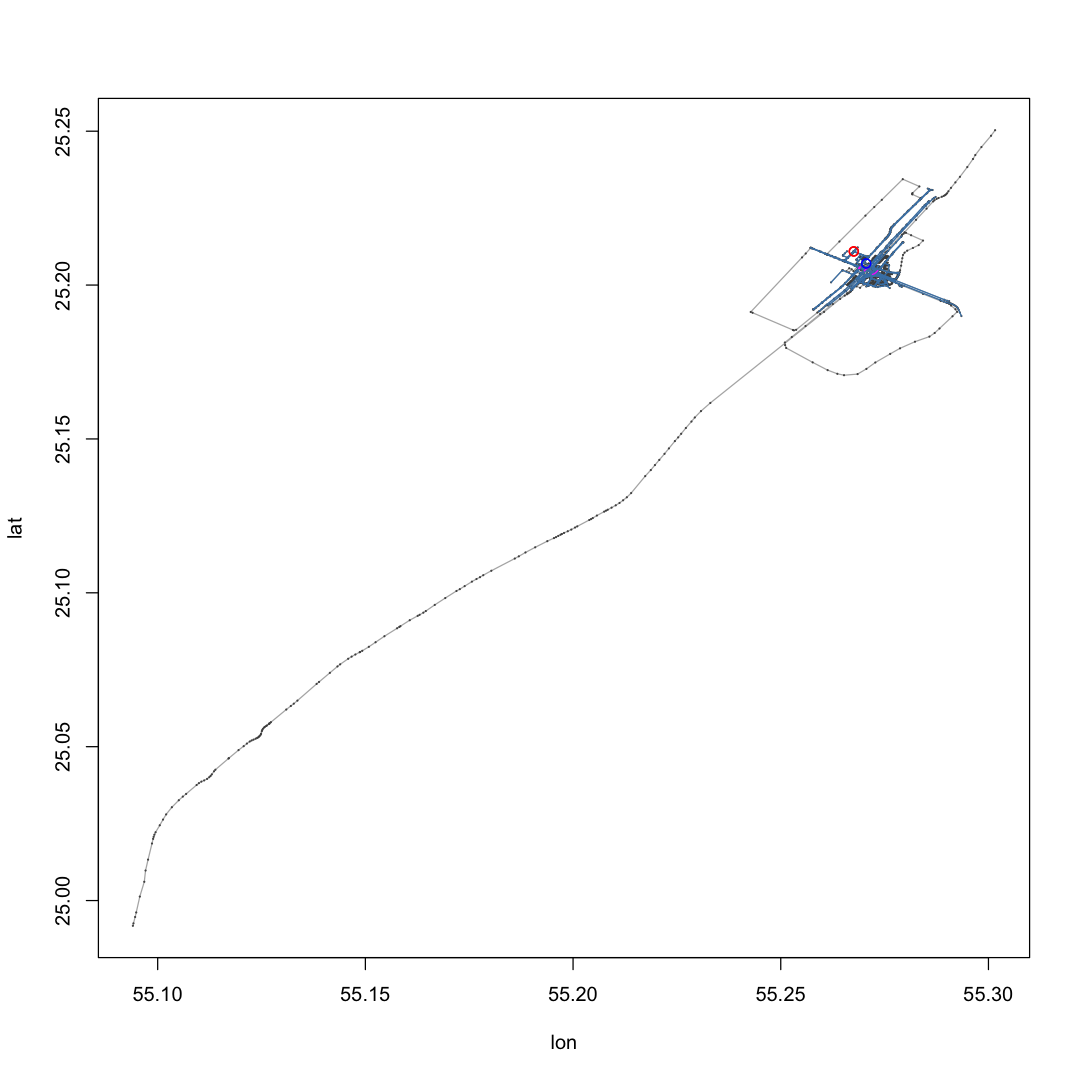

In [81]:
plot(sdubai)
plot_ways(hw_sdubai, add = TRUE, col = "steelblue")
plot_ways(tu_sdubai, add = TRUE, col = "magenta")
plot_nodes(ts_sdubai, add = TRUE, col = "red")
plot_nodes(bs_sdubai, add = TRUE, col = "blue")

In [73]:
ts <- find(bdubai, node(tags(v == "traffic_signals")))
ts_dubai <- subset(bdubai, node_ids = ts)

In [74]:
bs <- find(bdubai, node(tags(v %agrep% "busstop")))
bs_dubai <- subset(bdubai, node_ids = bs)

In [75]:
hw <- find(bdubai, way(tags(k == "highway")))
hw <- find_down(bdubai, way(hw))

In [76]:
hw_dubai <- subset(bdubai, ids = hw)

In [77]:
tu <- find(bdubai, way(tags(k == "tunnel")))
tu <- find_down(bdubai, way(tu))

In [78]:
tu_dubai <- subset(bdubai, ids = tu)

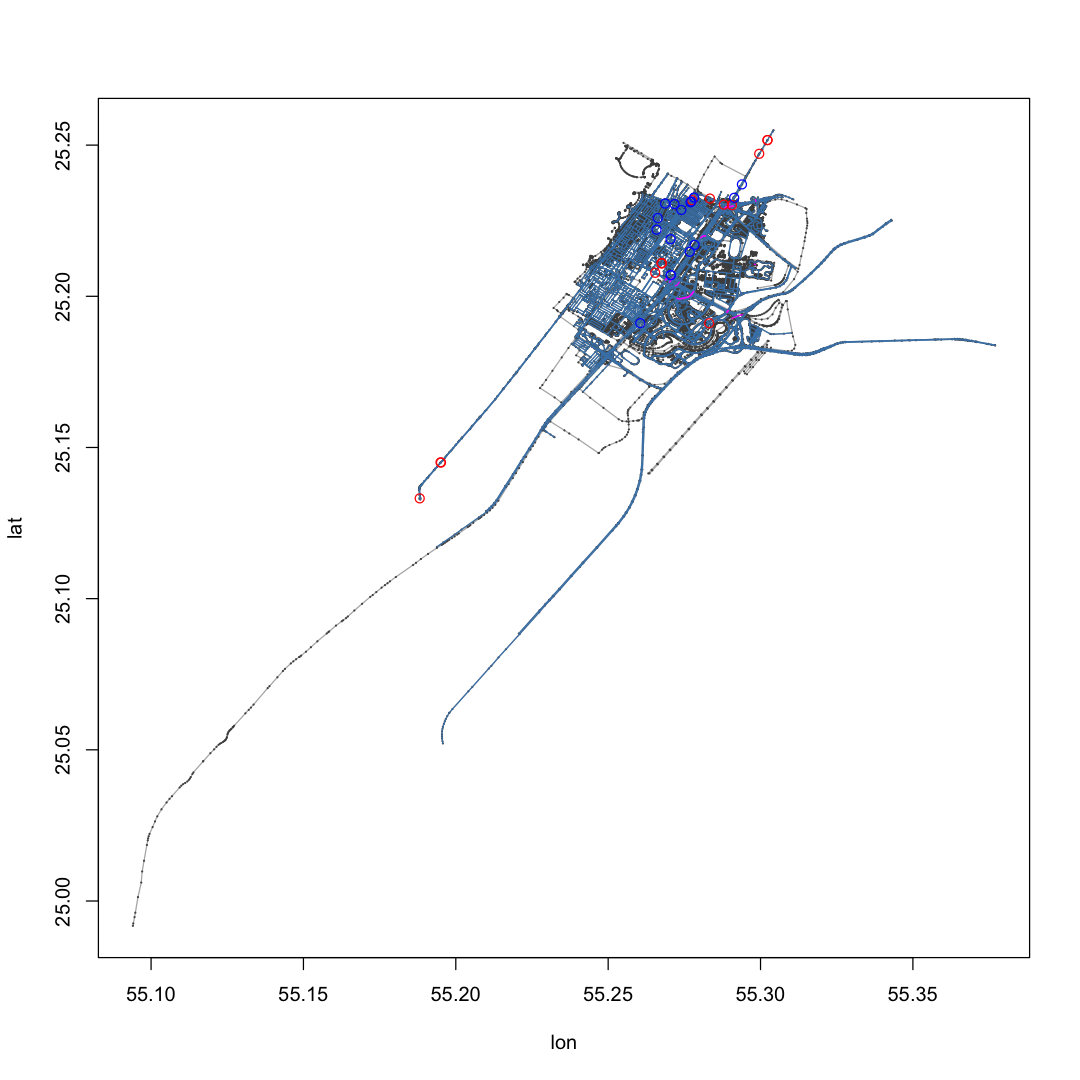

In [79]:
plot(bdubai)
plot_ways(hw_dubai, add = TRUE, col = "steelblue")
plot_ways(tu_dubai, add = TRUE, col = "magenta")
plot_nodes(ts_dubai, add = TRUE, col = "red")
plot_nodes(bs_dubai, add = TRUE, col = "blue")

In [93]:
Sys.setenv("plotly_username" = "OlgaBelitskaya")
Sys.setenv("plotly_api_key"="hh5tzqy61p")

In [94]:
Sys.getenv("plotly_api_key")

[1] "hh5tzqy61p"

In [95]:
Sys.getenv("plotly_username")

[1] "OlgaBelitskaya"

Storing 'username' as the environment variable 'plotly_username'


ERROR: Error in Sys.setenv(plotly_username = username): неправильная длина аргумента


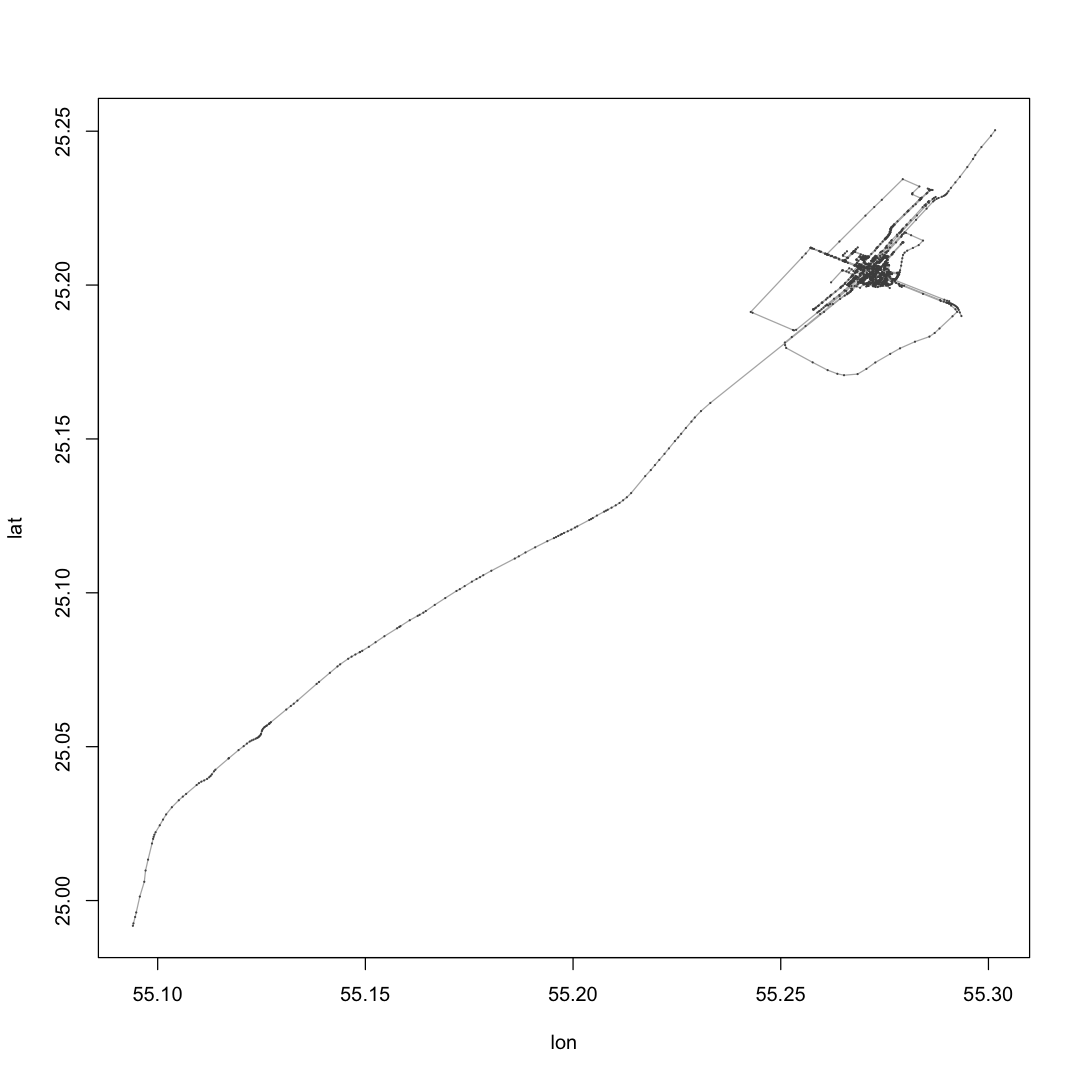

In [96]:
p <- plot(sdubai)
pp <- plotly(p)
pp

In [97]:
p
zm()

NULL

ERROR: Error in replot(rp = rp): R has to run in interactive mode.


#### 1.4. Size of downloaded files.

In [80]:
file.size("dubai_abu-dhabi.osm")

[1] 394382598

In [81]:
source1 <- osmsource_file("dubai_abu-dhabi.osm")

In [ ]:
dubai1 <- get_osm(complete_file(), source = source1)

In [ ]:
write.csv(dubai1$nodes$attrs, file = "rnodes.csv")
file.size("rnodes.csv")

In [ ]:
write.csv(dubai1$nodes$tags, file = "rnodes_tags.csv")
file.size("rnodes_tags.csv")

In [ ]:
write.csv(dubai1$ways$attrs, file = "rways.csv")
file.size("rways.csv")

In [ ]:
write.csv(dubai1$ways$tags, file = "rways_tags.csv")
file.size("rways_tags.csv")

In [ ]:
write.csv(dubai1$ways$refs, file = "rways_refs.csv")
file.size("rways_refs.csv")

In [ ]:
write.csv(dubai1$relations$attrs, file = "rrelations.csv")
file.size("rrelations.csv")

In [ ]:
write.csv(dubai1$relation$tags, file = "rrelations_tags.csv")
file.size("rrelations_tags.csv")

In [ ]:
write.csv(dubai1$relation$refs, file = "rrelations_refs.csv")
file.size("rrelations_refs.csv")

In [ ]:
ts1 <- find(dubai1, node(tags(v == "traffic_signals")))

In [ ]:
bs1 <- find(dubai1, node(tags(v %agrep% "busstop")))

In [ ]:
hw1 <- find(dubai1, way(tags(k == "highway")))

In [ ]:
hw_dubai1 <- find_down(dubai1, way(hw1))